# Data Ted
## An Analysis of the provided Ted Talks dataset
---
#### Matano Francesco S5253162
#### Vassallo Edoardo S4965918 

## Introduction

We gaming boys


## Imports


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import sklearn

In [2]:

daTed = pd.read_csv("data_ted.csv") # data_ted.csv")

In [3]:
daTed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


> ## 0. Objectives
>> ###  ????? (ancora da definire)

## 1. Spring Cleaning
+ Debby Millman 2020 June correct date
+ Innovations in sleep 2020 July
+ Substitute Nan author with Ted (1 row)

In [4]:
i = daTed['author'].isnull()
daTed['author'] = np.where(daTed['author'].isnull() == True, 'Ted',  daTed['author'])
for x in range(len(i)):
    if (i[x] == True):
        print(daTed[i])


                   title author           date  views  likes  \
3039  Year In Ideas 2015    Ted  December 2015    532     15   

                                          link  
3039  https://ted.com/talks/year_in_ideas_2015  


In [5]:
daTed.loc[(daTed['author'] == 'Debbie Millman') & (daTed['date'] == 'January 1970'), 'date'] = 'June 2020'
daTed.loc[(daTed['title'] == 'Innovations in sleep') & (daTed['date'] == 'January 1970'), 'date'] = 'July 2020'
daTed["date"] = pd.to_datetime(daTed['date'], format='%B %Y')
daTed.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


## 2.  Looking at the data

In [6]:
def print_stats_field(df, field):
    print("---------------------------------------")
    print("Statics statics data of field: ", field)
    print("---------------------------------------")
    print("mean:   ",  df[field].mean()  )
    print("std:    ",  df[field].std()   ) 
    print("var:    ",  df[field].var()   )
    print('mode:   ',  df[field].mode()[0]  )
    print('median: ',  df[field].median())
    print("---------------------------------------")

print_stats_field(daTed, 'views')
print_stats_field(daTed, 'likes')
    

---------------------------------------
Statics statics data of field:  views
---------------------------------------
mean:    2061575.9579044117
std:     3567097.765115676
var:     12724186465893.252
mode:    1300000
median:  1300000.0
---------------------------------------
---------------------------------------
Statics statics data of field:  likes
---------------------------------------
mean:    62607.616727941175
std:     107646.76946116687
var:     11587826975.425608
mode:    39000
median:  40500.0
---------------------------------------


<Axes: xlabel='views', ylabel='likes'>

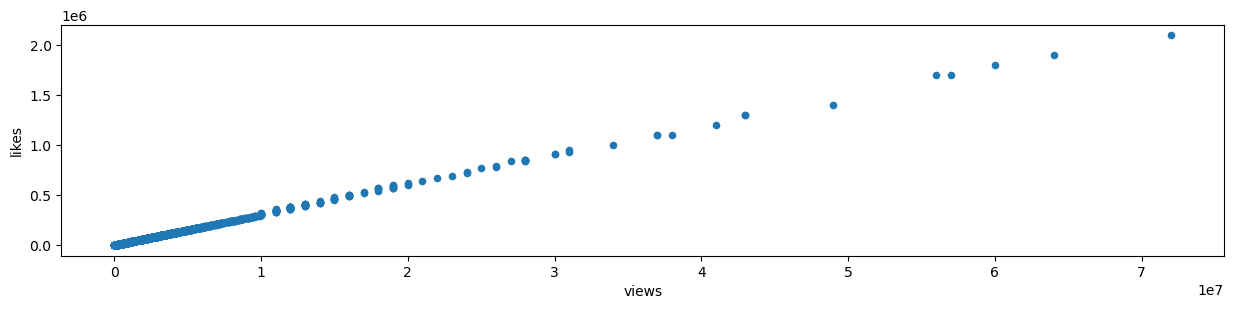

In [7]:
daTed.plot.scatter("views", "likes", figsize=(15, 3)) 

<Axes: title={'center': 'Numero di video realizzati ogni anno'}, xlabel='anno di pubblicazione', ylabel='numero di video'>

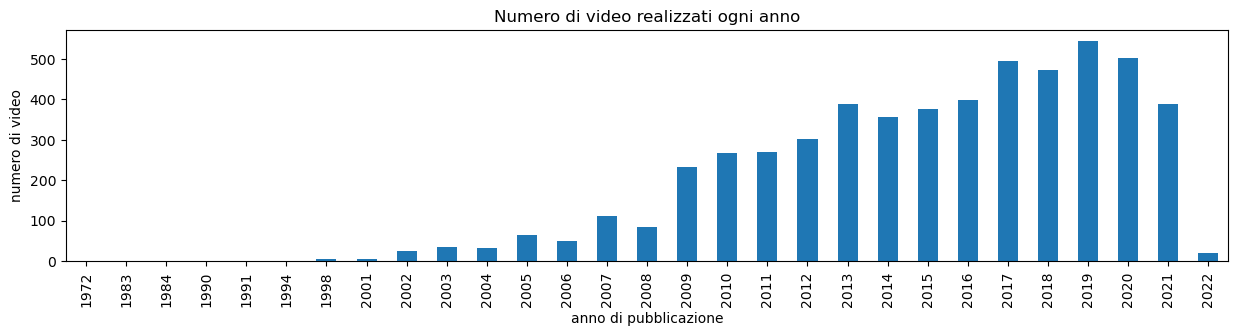

In [8]:
daTed.groupby(daTed.date.dt.year)['title'].count().plot(kind='bar', figsize=(15, 3), ylabel="numero di video", xlabel="anno di pubblicazione", title="Numero di video realizzati ogni anno")

<Axes: title={'center': 'Numero di visualizzazioni medie per i video di ogni anno'}, xlabel='anno di pubblicazione', ylabel='visualizzazioni medie'>

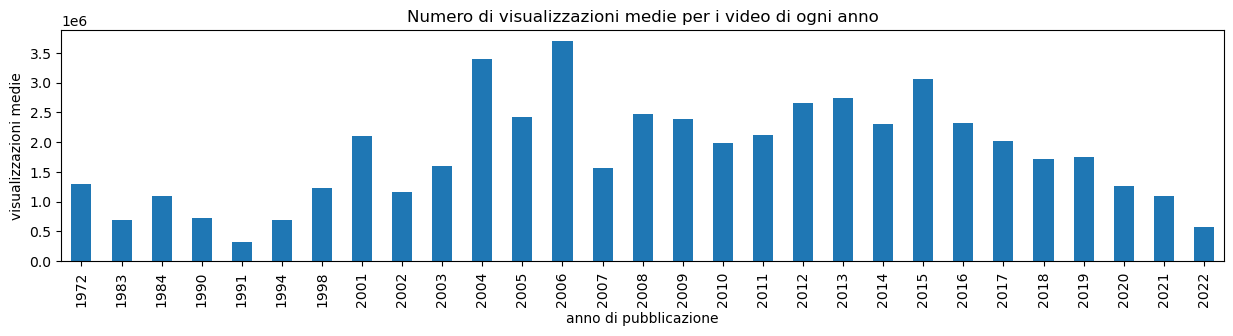

In [9]:
daTed.groupby(daTed.date.dt.year)['views'].mean().plot(kind='bar', figsize=(15, 3), ylabel="visualizzazioni medie", xlabel="anno di pubblicazione", title="Numero di visualizzazioni medie per i video di ogni anno")

<Axes: title={'center': 'Numero di like medio per i video di ogni anno'}, xlabel='anno di pubblicazione', ylabel='Numero like medio'>

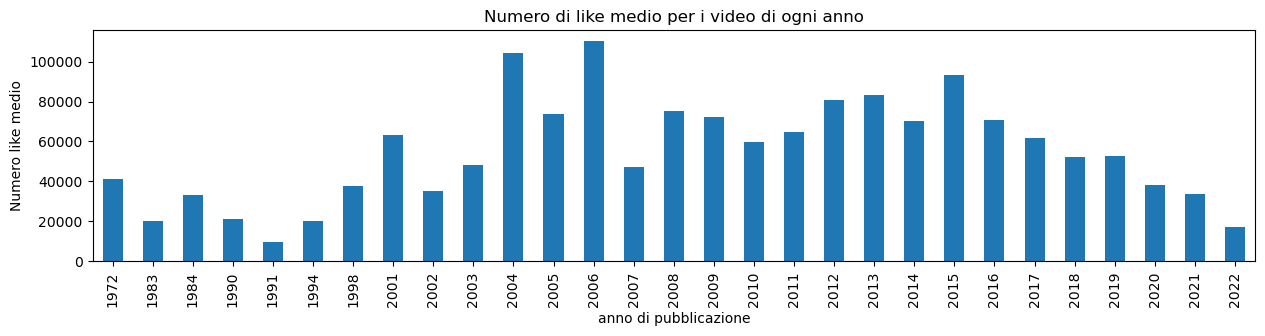

In [10]:
daTed.groupby(daTed.date.dt.year)['likes'].mean().plot(kind='bar', figsize=(15, 3), ylabel="Numero like medio", xlabel="anno di pubblicazione", title="Numero di like medio per i video di ogni anno")

#### OLAP


quantizzazioni

In [11]:
# Quantizzazione per decade
quantize_date = ['70\'s', '80\'s','90\'s','00\'s','10\'s', '20\'s']

daTed.loc[daTed['date'].between(pd.to_datetime("1970", format='%Y'), pd.to_datetime("1979", format='%Y'), 'both'), 'date_quant'] = quantize_date[0]
daTed.loc[daTed['date'].between(pd.to_datetime("1980", format='%Y'), pd.to_datetime("1989", format='%Y'), 'both'), 'date_quant'] = quantize_date[1]
daTed.loc[daTed['date'].between(pd.to_datetime("1990", format='%Y'), pd.to_datetime("1999", format='%Y'), 'both'), 'date_quant'] = quantize_date[2]
daTed.loc[daTed['date'].between(pd.to_datetime("2000", format='%Y'), pd.to_datetime("2009", format='%Y'), 'both'), 'date_quant'] = quantize_date[3]
daTed.loc[daTed['date'].between(pd.to_datetime("2010", format='%Y'), pd.to_datetime("2019", format='%Y'), 'both'), 'date_quant'] = quantize_date[4]
daTed.loc[daTed['date'].between(pd.to_datetime("2020", format='%Y'), pd.to_datetime("2029", format='%Y'), 'both'), 'date_quant'] = quantize_date[5]
daTed.head()

/tmp/ipykernel_5621/555986575.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '70's' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  daTed.loc[daTed['date'].between(pd.to_datetime("1970", format='%Y'), pd.to_datetime("1979", format='%Y'), 'both'), 'date_quant'] = quantize_date[0]


,title,author,date,views,likes,link,date_quant
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,20's
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,20's
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,20's
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,20's
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,20's


In [12]:
# Quantizzazione per quantità di views
## p.s. max views: 72M
quantize_views = ['<10K', '10K-100K','100K-500K','500K-1M','1M-20M', '>20M']

daTed.loc[daTed['views'].between(0        , 9999    , 'both'), 'views_quant'] = quantize_views[0]
daTed.loc[daTed['views'].between(10000    , 99999   , 'both'), 'views_quant'] = quantize_views[1]
daTed.loc[daTed['views'].between(100000   , 499999  , 'both'), 'views_quant'] = quantize_views[2]
daTed.loc[daTed['views'].between(500000   , 999999  , 'both'), 'views_quant'] = quantize_views[3]
daTed.loc[daTed['views'].between(1000000  , 19999999, 'both'), 'views_quant'] = quantize_views[4]
daTed.loc[daTed['views'].between(20000000 , 80000000, 'both'), 'views_quant'] = quantize_views[5]
daTed.head()

/tmp/ipykernel_5621/2965287115.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<10K' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  daTed.loc[daTed['views'].between(0        , 9999    , 'both'), 'views_quant'] = quantize_views[0]


,title,author,date,views,likes,link,date_quant,views_quant
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,20's,100K-500K
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,20's,100K-500K
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,20's,100K-500K
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,20's,100K-500K
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,20's,<10K


In [13]:
# Quantizzazione per quantità di likes
## p.s. max likes: 2.1M
quantize_likes = ['<10K', '10K-100K','100K-500K','500K-1M', '>1M']

daTed.loc[daTed['likes'].between(0       , 9999    , 'both'), 'likes_quant'] = quantize_likes[0]
daTed.loc[daTed['likes'].between(10000   , 99999   , 'both'), 'likes_quant'] = quantize_likes[1]
daTed.loc[daTed['likes'].between(100000  , 499999  , 'both'), 'likes_quant'] = quantize_likes[2]
daTed.loc[daTed['likes'].between(500000  , 999999  , 'both'), 'likes_quant'] = quantize_likes[3]
daTed.loc[daTed['likes'].between(1000000 , 1000000 , 'both'), 'likes_quant'] = quantize_likes[4]
daTed.head()

/tmp/ipykernel_5621/513284695.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<10K' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  daTed.loc[daTed['likes'].between(0       , 9999    , 'both'), 'likes_quant'] = quantize_likes[0]


,title,author,date,views,likes,link,date_quant,views_quant,likes_quant
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,20's,100K-500K,10K-100K
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,20's,100K-500K,<10K
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,20's,100K-500K,10K-100K
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,20's,100K-500K,10K-100K
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,20's,<10K,<10K


In [14]:
# costruzione OLAP
OLAP = np.zeros((len(quantize_likes) , len(quantize_views) , len(quantize_date)))

for z in range(0, len(quantize_date)):
  ted_date = daTed[daTed['date_quant'] == quantize_date[z]]
  for j in range(0, len(quantize_views)):
    for i in range(0, len(quantize_likes)):
      OLAP[i,j,z] = np.sum((ted_date['views_quant'] == quantize_views[j]) & (ted_date['likes_quant'] == quantize_likes[i])) 

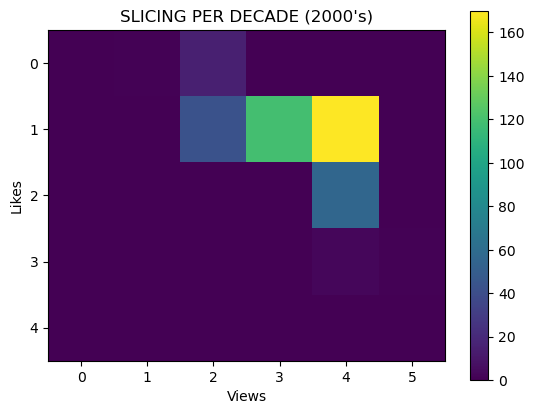

In [15]:
# Visualizziamo la matrice
plt.figure()
plt.imshow(OLAP[:,:,3])
plt.title('SLICING PER DECADE (2000\'s)')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.colorbar()

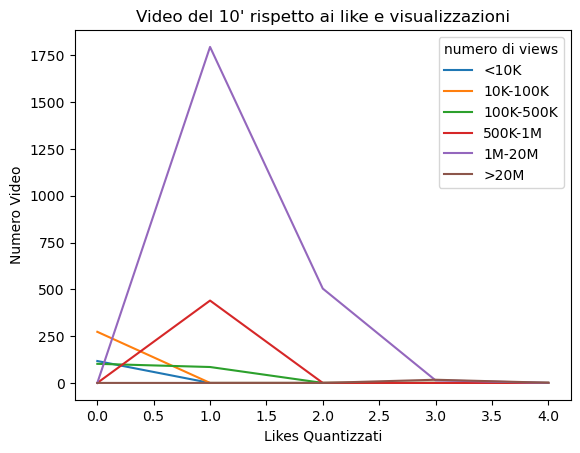

In [16]:
# Slicing

slice_2010 = OLAP[:,:,4]

#codice qui 
plt.figure()
plt.title('Video del 10\' rispetto ai like e visualizzazioni')
plt.xlabel('Likes Quantizzati')
plt.ylabel('Numero Video')
plt.plot(slice_2010[:,:])
plt.legend(quantize_views, title="numero di views")

<BarContainer object of 6 artists>

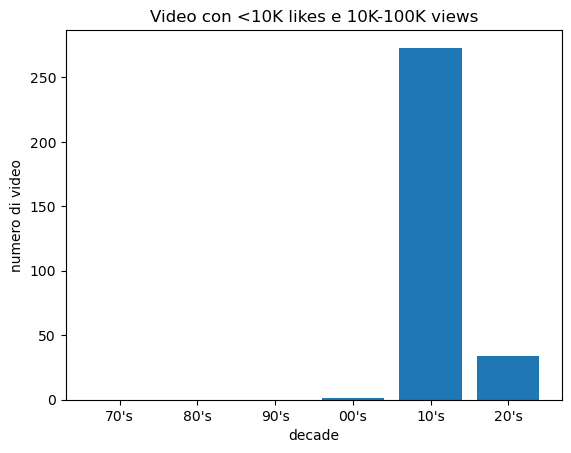

In [17]:
# dicing
plt.title('Video con <10K likes e 10K-100K views')
plt.ylabel('numero di video')
plt.xlabel("decade")
plt.bar(quantize_date, OLAP[0,1,:])

## 3. Test Statistico

## 4. Metodo Predittivo


## 5. Clustering